# Import Packages

In [1]:
import os

import pandas as pd
import numpy as np
from decimal import Decimal
from IPython.display import Image
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Import CSV file

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/jrcinco/supply-chain-shipment-price-data/master/SCMS_Delivery_History_Dataset.csv').fillna('no_value')
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,no_value,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,no_value
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,"6,200.00",6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,no_value
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,no_value,Test kit,100,500,"40,000.00",80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,no_value
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,"127,360.80",3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,no_value
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,"121,600.00",3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,no_value


In [3]:
dataset.shape

(10324, 33)

In [4]:
dataset.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [5]:
for col in dataset.columns:
    print(col,":")
    print(dataset[col].unique(),'\n')

ID :
[    1     3     4 ... 86821 86822 86823] 

Project Code :
['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01'
 '100-HT-T01' '117-ET-T01' '116-ZA-T01' '123-NG-T01' '125-HT-T01'
 '102-GY-T01' '119-NA-T01' '131-NG-T01' '102-BW-T01' '111-MZ-T01'
 '144-BW-T01' '102-KE-T01' '133-NG-T01' '100-KZ-T01' '141-NA-T01'
 '114-UG-T01' '105-GY-T01' '139-NA-T01' '129-KG-T01' '100-SN-T01'
 '128-BJ-T01' '102-LS-T01' '130-NG-T01' '100-BW-T01' '100-ZW-T01'
 '100-PK-T01' '126-NG-T01' '151-NG-T01' '100-SZ-T01' '100-GH-T01'
 '120-AO-T01' '132-NG-T01' '153-NG-T01' '100-LB-T01' '151-NG-T30'
 '127-KE-T01' '510-KE-T01' '100-SL-T01' '136-RW-T01' '102-KE-T30'
 '108-VN-T30' '110-ZM-T30' '106-HT-T30' '105-SS-T30' '111-MZ-T30'
 '102-BI-T30' '122-HT-T30' '161-ZA-T30' '116-ZA-T30' '133-NG-T30'
 '103-DO-T30' '104-CI-T30' '107-RW-T30' '103-MW-T30' '101-CD-T30'
 '102-SZ-T30' '114-UG-T30' '105-DO-T30' '113-ZW-T30' '103-CM-T30'
 '109-TZ-T30

In [6]:
dataset.nunique()

ID                              10324
Project Code                      142
PQ #                             1237
PO / SO #                        6233
ASN/DN #                         7030
Country                            43
Managed By                          4
Fulfill Via                         2
Vendor INCO Term                    8
Shipment Mode                       5
PQ First Sent to Client Date      765
PO Sent to Vendor Date            897
Scheduled Delivery Date          2006
Delivered to Client Date         2093
Delivery Recorded Date           2042
Product Group                       5
Sub Classification                  6
Vendor                             73
Item Description                  184
Molecule/Test Type                 86
Brand                              48
Dosage                             55
Dosage Form                        17
Unit of Measure (Per Pack)         31
Line Item Quantity               5065
Line Item Value                  8741
Pack Price  

In [7]:
dataset.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [8]:
dataset.isna().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
Country                         0
Managed By                      0
Fulfill Via                     0
Vendor INCO Term                0
Shipment Mode                   0
PQ First Sent to Client Date    0
PO Sent to Vendor Date          0
Scheduled Delivery Date         0
Delivered to Client Date        0
Delivery Recorded Date          0
Product Group                   0
Sub Classification              0
Vendor                          0
Item Description                0
Molecule/Test Type              0
Brand                           0
Dosage                          0
Dosage Form                     0
Unit of Measure (Per Pack)      0
Line Item Quantity              0
Line Item Value                 0
Pack Price                      0
Unit Price                      0
Manufacturing Site              0
First Line Des

In [9]:
dataset.rename(columns={"Freight Cost (USD)": "Freight_Cost_USD"}, inplace=True)

In [10]:
dataset[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10320,60,21072,6.52,0.11,See DN-4313 (ID#:83921),Côte d'Ivoire,Truck,See DN-4313 (ID#:83921)
10321,30,514526,9.99,0.33,Weight Captured Separately,Zambia,Truck,Freight Included in Commodity Cost
10322,60,17465,6.52,0.11,1392,Zimbabwe,Truck,Freight Included in Commodity Cost


# Total 16 Country wise count with graph

In [11]:
dataset['Country'].unique()

array(["Côte d'Ivoire", 'Vietnam', 'Nigeria', 'Zambia', 'Tanzania',
       'Rwanda', 'Haiti', 'Zimbabwe', 'Ethiopia', 'South Africa',
       'Guyana', 'Namibia', 'Botswana', 'Mozambique', 'Kenya',
       'Kazakhstan', 'Uganda', 'Kyrgyzstan', 'Senegal', 'Benin',
       'Lesotho', 'Pakistan', 'Swaziland', 'Ghana', 'Angola', 'Lebanon',
       'Sierra Leone', 'Cameroon', 'South Sudan', 'Burundi',
       'Dominican Republic', 'Malawi', 'Congo, DRC', 'Sudan', 'Mali',
       'Guatemala', 'Togo', 'Afghanistan', 'Liberia', 'Burkina Faso',
       'Guinea', 'Libya', 'Belize'], dtype=object)

Top 43 Countries Wise Count 

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  

C:\Users\Priya\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'South Africa'),
  Text(1, 0, 'Nigeria'),
  Text(2, 0, "Côte d'Ivoire"),
  Text(3, 0, 'Uganda'),
  Text(4, 0, 'Vietnam'),
  Text(5, 0, 'Zambia'),
  Text(6, 0, 'Haiti'),
  Text(7, 0, 'Mozambique'),
  Text(8, 0, 'Zimbabwe'),
  Text(9, 0, 'Tanzania'),
  Text(10, 0, 'Rwanda'),
  Text(11, 0, 'Congo, DRC'),
  Text(12, 0, 'Guyana'),
  Text(13, 0, 'Ethiopia'),
  Text(14, 0, 'South Sudan'),
  Text(15, 0, 'Kenya')])

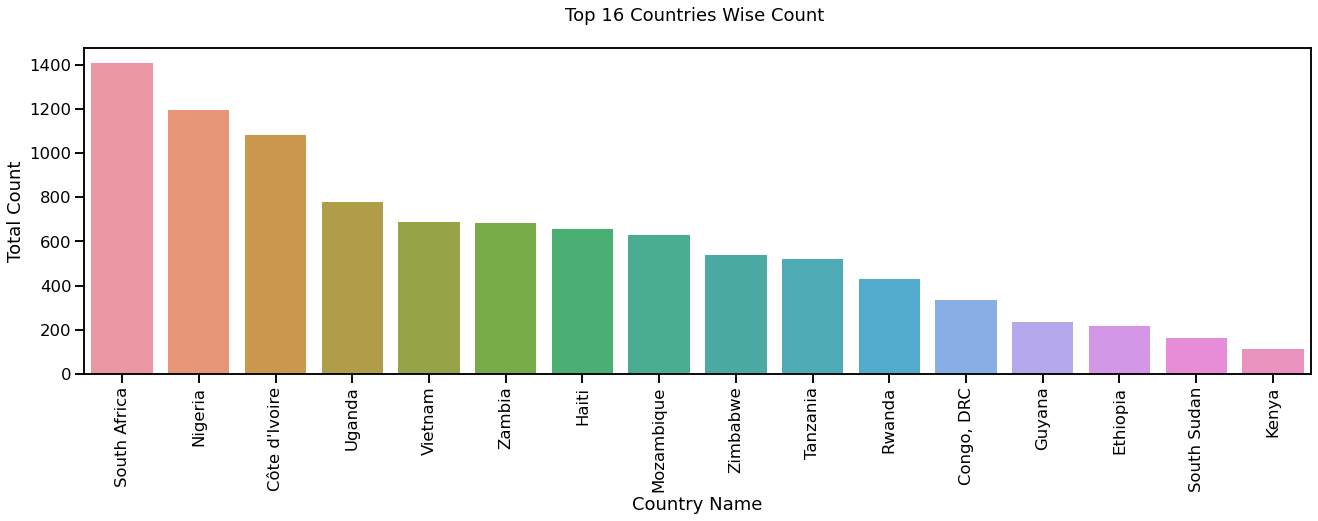

In [12]:
ItemCount = dataset["Country"].value_counts().nlargest(43)
print("Top 43 Countries Wise Count \n")
print(ItemCount)
sn.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sn.countplot(dataset['Country'],order = dataset['Country'].value_counts().nlargest(16).index)
plt.title('Top 16 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')
plt.xticks(rotation=90)

# Shipment Mode percentage wise Pie Chart

In [13]:
ShippingMode = dataset["Shipment Mode"].value_counts()
ShippingMode

Air            6113
Truck          2830
Air Charter     650
Ocean           371
no_value        360
Name: Shipment Mode, dtype: int64

In [14]:
ShippingMode.index

Index(['Air', 'Truck', 'Air Charter', 'Ocean', 'no_value'], dtype='object')

In [15]:
labels = (np.array(ShippingMode.index))
labels

array(['Air', 'Truck', 'Air Charter', 'Ocean', 'no_value'], dtype=object)

In [16]:
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))
sizes

array([59.21154591, 27.41185587,  6.2960093 ,  3.59356838,  3.48702053])

In [17]:
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
fig = go.Figure(data=trace, layout=layout)
py.iplot(fig)

# ETL : Extract, Transform and Load

In [18]:
dataset['Freight_Cost_USD'][0:50]

0                                 780.34
1                                 4521.5
2                                1653.78
3                               16007.06
4                               45450.08
5                                5920.42
6     Freight Included in Commodity Cost
7                                6212.41
8                  See ASN-93 (ID#:1281)
9     Freight Included in Commodity Cost
10    Freight Included in Commodity Cost
11                              13569.49
12                   Invoiced Separately
13                              64179.42
14                               1760.32
15    Freight Included in Commodity Cost
16    Freight Included in Commodity Cost
17                                3120.7
18                                912.96
19                               2682.47
20                              15893.71
21    Freight Included in Commodity Cost
22                               4193.49
23                               1767.38
24              

In [19]:
regex = {
    "id_number": ":\d*"
}
def change_to_number(freight_cost_usd):
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = dataset.query("ID == "+id)
        return filtered['Freight_Cost_USD'].item()
    else:
        return freight_cost_usd
    
def convert_to_number(weight):
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    if match:
        id = match.group(0).replace(':','')
        filtered = dataset.query("ID == "+id)
        return filtered['Weight (Kilograms)'].item()
    else:
        return weight


In [20]:
dataset['Freight_Cost_USD_Clean'] = dataset['Freight_Cost_USD'].apply(change_to_number)
dataset['Weight_Kilograms_Clean'] = dataset['Weight (Kilograms)'].apply(convert_to_number)

In [21]:
freight_cost_indexes = dataset.index[(dataset['Freight_Cost_USD_Clean'] == 'Freight Included in Commodity Cost') 
                        | (dataset['Freight_Cost_USD_Clean'] == 'Invoiced Separately')].tolist()
weight_indexes = dataset.index[dataset['Weight_Kilograms_Clean'] == 'Weight Captured Separately'].tolist()
shipment_indexes = dataset.index[dataset['Shipment Mode'] == 'no_value'].tolist()
print("Freight_Cost_USD_Clean indexes:",len(freight_cost_indexes))
print("Weight_Kilograms_Clean indexes:",len(weight_indexes))
print("Shipment Mode indexes:         ",len(shipment_indexes))
indexes = list(set(freight_cost_indexes + weight_indexes + shipment_indexes))
print("Indexes:",len(indexes))
DataSetClean = dataset.drop(indexes)
print("Size:", DataSetClean.shape)

Freight_Cost_USD_Clean indexes: 1786
Weight_Kilograms_Clean indexes: 1633
Shipment Mode indexes:          360
Indexes: 2142
Size: (8182, 35)


In [22]:
DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight (Kilograms)',
                          'Country', 'Shipment Mode', 'Freight_Cost_USD']]

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight (Kilograms),Country,Shipment Mode,Freight_Cost_USD
0,30,19,29.00,0.97,13,Côte d'Ivoire,Air,780.34
1,240,1000,6.20,0.03,358,Vietnam,Air,4521.5
2,100,500,80.00,0.80,171,Côte d'Ivoire,Air,1653.78
3,60,31920,3.99,0.07,1855,Vietnam,Air,16007.06
4,60,38000,3.20,0.05,7590,Vietnam,Air,45450.08
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,Nigeria,Air Charter,3410
10317,30,6724,3.12,0.10,See DN-4282 (ID#:83919),Nigeria,Air,See DN-4282 (ID#:83919)
10318,60,205243,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)
10319,60,166571,3.60,0.06,See DN-4307 (ID#:83920),Zimbabwe,Truck,See DN-4307 (ID#:83920)


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Country','Shipment Mode','Manufacturing Site']
for i in cols :
    DataSetClean[i] = le.fit_transform(DataSetClean[i])

In [24]:
DataSetClean['Country'].astype('int')
DataSetClean['Shipment Mode'].astype('int')
DataSetClean['Manufacturing Site'].astype('int')
DataSetClean['Freight_Cost_USD_Clean'] = pd.to_numeric(DataSetClean['Freight_Cost_USD_Clean'])
DataSetClean['Weight_Kilograms_Clean'] = pd.to_numeric(DataSetClean['Weight_Kilograms_Clean'])
DataSetClean.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                           int32
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                     int32
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


# Machine Learning Modeling

In [25]:
predictors = DataSetClean[['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Pack Price', 'Unit Price', 'Weight_Kilograms_Clean',
                          'Country', 'Shipment Mode', 'Manufacturing Site']]
predictors

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean,Country,Shipment Mode,Manufacturing Site
0,30,19,29.00,0.97,13,7,0,62
1,240,1000,6.20,0.03,358,35,0,8
2,100,500,80.00,0.80,171,7,0,3
3,60,31920,3.99,0.07,1855,35,0,65
4,60,38000,3.20,0.05,7590,35,0,8
...,...,...,...,...,...,...,...,...
10316,60,15000,6.52,0.11,1547,23,1,8
10317,30,6724,3.12,0.10,6183,23,0,70
10318,60,205243,3.60,0.06,25880,37,3,16
10319,60,166571,3.60,0.06,25880,37,3,52


In [26]:
predictors.describe()

,Unit of Measure (Per Pack),Line Item Quantity,Pack Price,Unit Price,Weight_Kilograms_Clean,Country,Shipment Mode,Manufacturing Site
count,"8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00","8,182.00"
mean,75.33,"21,201.81",20.68,0.60,"4,545.52",22.96,0.81,27.82
std,76.55,"42,549.60",41.77,2.35,"13,661.93",10.94,1.25,23.01
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,847.25,3.78,0.07,283.00,14.00,0.00,8.00
50%,60.00,"4,449.50",8.26,0.15,"1,351.50",23.00,0.00,16.00
75%,90.00,"21,505.50",20.50,0.41,"4,481.25",34.00,2.00,51.00
max,"1,000.00","619,999.00","1,250.00",30.00,"857,354.00",37.00,3.00,73.00


In [27]:
targets = DataSetClean.Freight_Cost_USD_Clean
targets

0                     780.34
1                   4,521.50
2                   1,653.78
3                  16,007.06
4                  45,450.08
                ...         
10316               3,410.00
10317              47,281.56
10318              46,111.55
10319              46,111.55
10320              14,734.92
Name: Freight_Cost_USD_Clean, Length: 8182, dtype: float64

# Correlations

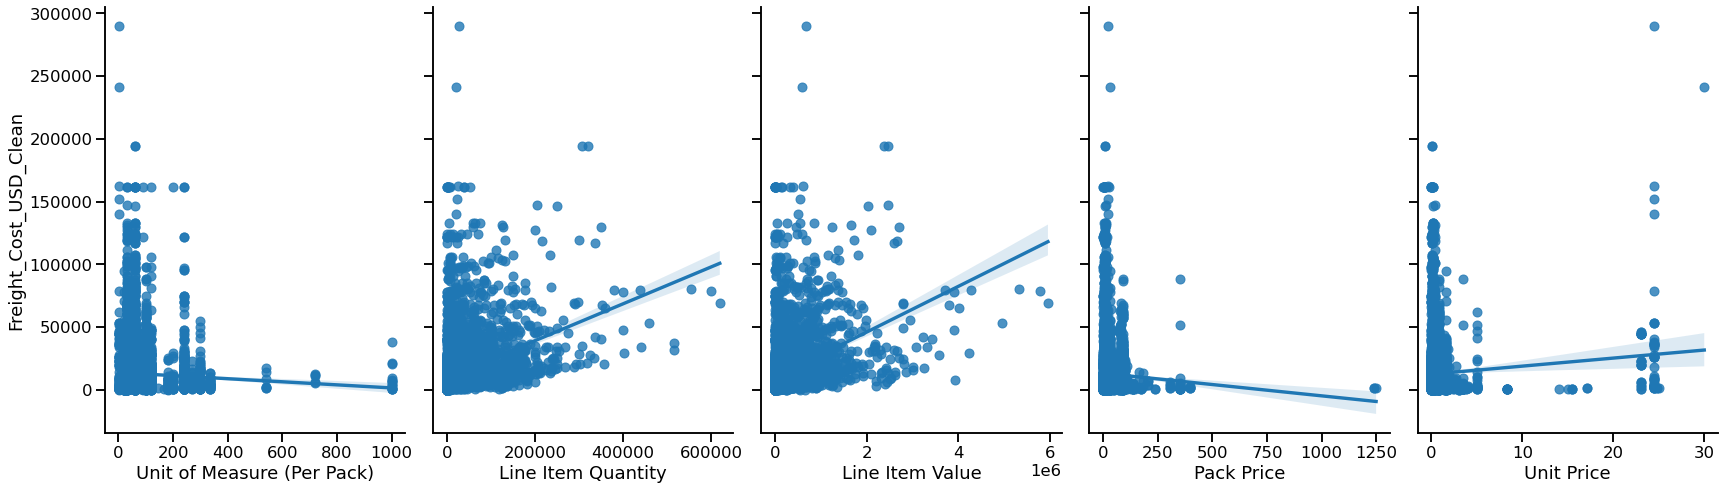

In [28]:
sn.pairplot(DataSetClean, 
            x_vars=['Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price'],
            y_vars='Freight_Cost_USD_Clean', height=7, aspect=0.7, kind='reg')

# Test and Training Data

In [29]:
train_features, test_features, train_targets, test_targets = train_test_split(predictors, targets, test_size=0.2, random_state=3)

print('test features shape: ', test_features.shape)
print('test targets shape: ', test_targets.shape)

print('train features shape: ', train_features.shape)
print('train targets shape: ', train_targets.shape)

test features shape:  (1637, 8)
test targets shape:  (1637,)
train features shape:  (6545, 8)
train targets shape:  (6545,)


# Decision Tree Regressor

In [30]:
tree_regressor = DecisionTreeRegressor(max_depth=15) # MAE 6.08 minutes, R2 -1.20
tree_regressor = tree_regressor.fit(train_features, train_targets)
print('node_count => ', tree_regressor.tree_.node_count)
tree_regressor.get_params()

node_count =>  4669


{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [31]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(tree_regressor.feature_importances_)

In [32]:
feature_list

['Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Pack Price',
 'Unit Price',
 'Weight_Kilograms_Clean',
 'Country',
 'Shipment Mode',
 'Manufacturing Site']

In [33]:
importances

[0.05572967315366134,
 0.04558620832501363,
 0.051129014607308614,
 0.03999906182748232,
 0.5074210903026047,
 0.1685222740580593,
 0.10872784143403909,
 0.022884836291831048]

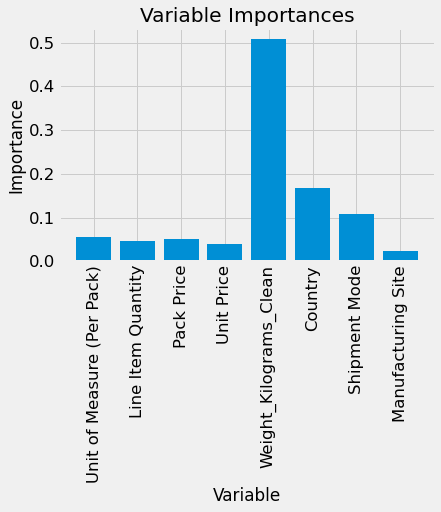

In [34]:
# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(feature_list, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');            

In [35]:
#Predictions
tree_predictions = tree_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':tree_predictions})  
df

,Actual,Predicted
10026,"3,526.27","2,674.41"
5425,"1,400.91","1,485.09"
2860,"11,314.20","13,780.58"
7063,"6,036.96","5,586.26"
1750,"2,989.45","3,783.24"
...,...,...
9356,"2,528.69","3,060.91"
1400,"1,053.86",916.41
317,"12,770.05","14,829.77"
3440,365.48,916.41


**Metrics**

In [38]:
results = pd.DataFrame({'Score':['Mean Absolute Error', 'Root Mean Squared Error','Mean Squared Error','R Square']})
tree_score = [metrics.mean_absolute_error(test_targets,tree_predictions),
             np.sqrt(metrics.mean_squared_error(test_targets,tree_predictions)),
             metrics.mean_squared_error(test_targets,tree_predictions)/10000,
             metrics.r2_score(test_targets,tree_predictions)*10000]
results['Tree Decision'] = tree_score

print('Mean Absolute Error : {}'.format(results.iloc[0,1]))
print('Root Mean Squared Error : {}'.format(results.iloc[1,1]))
print('Mean Squared Error : {}'.format(results.iloc[2,1]))
print('R Square : {}'.format(results.iloc[3,1]))
results

Mean Absolute Error : 4844.993195509918
Root Mean Squared Error : 10537.483945998003
Mean Squared Error : 11103.856791216564
R Square : 6907.991306320391


,Score,Tree Decision
0,Mean Absolute Error,"4,844.99"
1,Root Mean Squared Error,"10,537.48"
2,Mean Squared Error,"11,103.86"
3,R Square,"6,907.99"


# Random Forest Regressor

In [39]:
rand_forest_regressor = RandomForestRegressor(n_estimators=500, random_state=3)
rand_forest_regressor = rand_forest_regressor.fit(train_features, train_targets)
rand_forest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

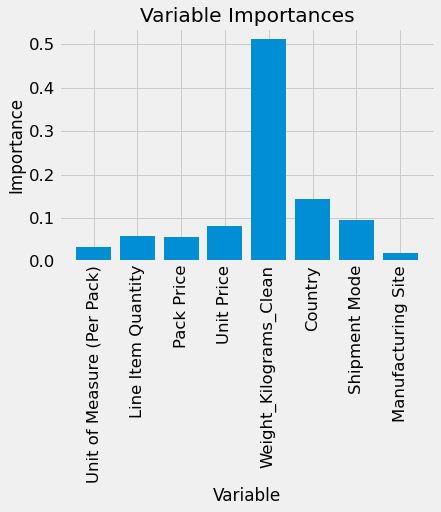

In [40]:
# Saving feature names for later use
feature_list = list(predictors.columns)
importances = list(rand_forest_regressor.feature_importances_)

# Set the style
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation='vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Verify Model using Test Data**

In [41]:
rf_predictions = rand_forest_regressor.predict(test_features)
df = pd.DataFrame({'Actual':test_targets, 'Predicted':rf_predictions})  
df

,Actual,Predicted
10026,"3,526.27","3,802.33"
5425,"1,400.91","1,522.20"
2860,"11,314.20","13,217.26"
7063,"6,036.96","6,381.25"
1750,"2,989.45","5,599.18"
...,...,...
9356,"2,528.69","3,314.35"
1400,"1,053.86",948.01
317,"12,770.05","13,427.64"
3440,365.48,805.48


**Metrics**

In [42]:
rf_score = [metrics.mean_absolute_error(test_targets, rf_predictions),
            np.sqrt(metrics.mean_squared_error(test_targets, rf_predictions)),
            metrics.mean_squared_error(test_targets, rf_predictions)/10000,
            metrics.r2_score(test_targets, rf_predictions)*10000]
results['Random Forest'] = rf_score

print('Mean Absolute Error:     {} '.format(results.iloc[0, 2]))    
print('Root Mean Squared Error: {} '.format(results.iloc[1, 2]))
print('Mean Squared Error:      {} '.format(results.iloc[2, 2]))
print('R Square:                {} '.format(results.iloc[3, 2])) # 1 is better
results

Mean Absolute Error:     4256.241394362412 
Root Mean Squared Error: 8919.358103835504 
Mean Squared Error:      7955.49489844561 
R Square:                7784.692305472129 


,Score,Tree Decision,Random Forest
0,Mean Absolute Error,"4,844.99","4,256.24"
1,Root Mean Squared Error,"10,537.48","8,919.36"
2,Mean Squared Error,"11,103.86","7,955.49"
3,R Square,"6,907.99","7,784.69"


In [44]:
results.iloc[0,1]

4844.993195509918

# Comparison

In [51]:
model_name = ['DesicionTree', 'RandomForest']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[0,1:],
    name='Mean Absolute Error',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[1,1:],
    name='Root Mean Squared Error',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[2,1:],
    name='Mean Squared Error',
    marker_color='mediumslateblue'
))
fig.add_trace(go.Bar(
    x=model_name,
    y=results.iloc[3,1:],
    name='R Square',
    marker_color='darkslateblue'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.layout.update(barmode='group', xaxis_tickangle=-45)
fig.show()